**Data Import and Preparation**

In [1]:
import os

# List files in the root directory to verify paths
print("Root directory contents:", os.listdir("/kaggle/input"))

Root directory contents: ['tsla_raw_data_2010_2024.csv']


In [2]:
import os

# Define the path to your specific file
file_path = "/kaggle/input/tsla_raw_data_2010_2024.csv"

# Verify the path
if os.path.exists(file_path):
    print("File found:", file_path)
else:
    print("File not found. Check your path.")

# Now you can load the file, for example, using pandas
import pandas as pd

data = pd.read_csv(file_path)
print(data.head())


File found: /kaggle/input/tsla_raw_data_2010_2024.csv
         date     open     high      low    close    volume  adjusted_close  \
0  29-06-2010  18.9999  24.9999  17.5401  23.8899  18783278          1.5927   
1  30-06-2010  25.7901  30.4191  23.3001  23.8299  17194392          1.5887   
2  01-07-2010  24.9999  25.9200  20.2701  21.9600   8229862          1.4640   
3  02-07-2010  23.0001  23.1000  18.7101  19.2000   5141806          1.2800   
4  06-07-2010  20.0001  20.0001  15.8301  16.1100   6879295          1.0740   

   change_percent  avg_vol_20d  
0             NaN          NaN  
1           -0.25          NaN  
2           -7.85          NaN  
3          -12.57          NaN  
4          -16.09          NaN  


**1.LSTM**

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
LSTM - Mean Absolute Error (MAE): 0.009115563913355473
LSTM - Mean Squared Error (MSE): 0.0007945837726921119
LSTM - Root Mean Squared Error (RMSE): 0.028188362362721816
LSTM - R-squared (R2): 0.9713999831962082
LSTM - Explained Variance Score (EVS): 0.9714318893024316


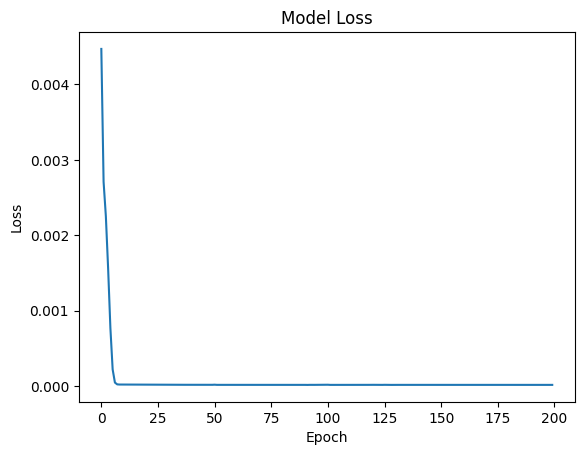

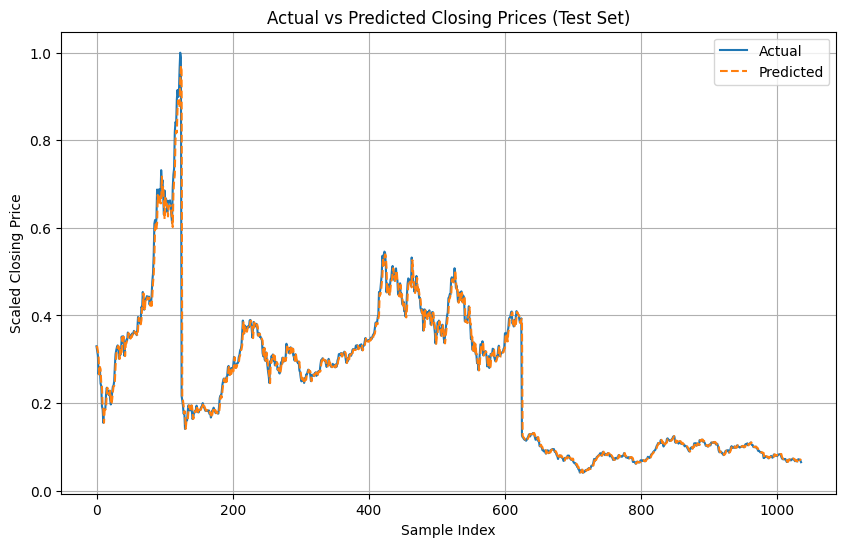

In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv', parse_dates=['date'], dayfirst=True)

# Create a 1-day lag on the target variable 'close'
data['close_lagged'] = data['close'].shift(1)

# Drop any rows with NaN values created by lagging
data = data.dropna()

# Scale the close prices
data['scaled_close'] = (data['close'] - data['close'].min()) / (data['close'].max() - data['close'].min())

# Prepare features and target variable for LSTM
X = data['scaled_close'].values[:-1]  # Features
y = data['scaled_close'].values[1:]    # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Reshape the data for LSTM input
X_train = X_train.reshape((X_train.shape[0], 1, 1))  # Reshape to [samples, time steps, features]
X_test = X_test.reshape((X_test.shape[0], 1, 1))      # Reshape to [samples, time steps, features]

# Create the LSTM model
model = Sequential()
model.add(Input(shape=(1, 1)))  # Use Input layer to define input shape
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print(f"LSTM - Mean Absolute Error (MAE): {mae}")
print(f"LSTM - Mean Squared Error (MSE): {mse}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse}")
print(f"LSTM - R-squared (R2): {r2}")
print(f"LSTM - Explained Variance Score (EVS): {evs}")

# Plot training loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Closing Prices (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.grid()
plt.show()


**2.Logistic Regression**

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             mean_absolute_error, mean_squared_error,
                             accuracy_score, r2_score, explained_variance_score, log_loss, brier_score_loss)

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Apply 1-day lag to the closing prices
data['close_lagged'] = data['close'].shift(1)

# Convert your target variable into binary (0/1)
data['target'] = (data['close_lagged'] > data['close_lagged'].median()).astype(int)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Define features and target variable
X = data[['open', 'high', 'low']]  # Example features
y = data['target']                  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Output the results
print("Logistic Regression Model Coefficients:")
print(log_reg.coef_)
print("\nLogistic Regression Model Intercept:")
print(log_reg.intercept_)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and print evaluation metrics for classification
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Evaluation metrics that are more relevant for regression (using predicted probabilities)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_proba)  # R² Score on predicted probabilities
evs = explained_variance_score(y_test, y_pred_proba)  # Explained Variance Score

# Print evaluation metrics
print(f"LSTM - Mean Absolute Error (MAE): {mae}")
print(f"LSTM - Mean Squared Error (MSE): {mse}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse}")
print(f"LSTM - R-squared (R2): {r2}")
print(f"LSTM - Explained Variance Score (EVS): {evs}")

Logistic Regression Model Coefficients:
[[0.38809398 0.05589634 0.07389736]]

Logistic Regression Model Intercept:
[-120.87715902]

Confusion Matrix:
[[528   6]
 [  7 495]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       534
           1       0.99      0.99      0.99       502

    accuracy                           0.99      1036
   macro avg       0.99      0.99      0.99      1036
weighted avg       0.99      0.99      0.99      1036


Accuracy: 0.99
LSTM - Mean Absolute Error (MAE): 0.012548262548262547
LSTM - Mean Squared Error (MSE): 0.012548262548262547
LSTM - Root Mean Squared Error (RMSE): 0.11201902761701936
LSTM - R-squared (R2): 0.9733929895357166
LSTM - Explained Variance Score (EVS): 0.9734008548858126


**3.KNN**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             r2_score, explained_variance_score)

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Apply 1-day lag to the closing prices
data['close_lagged'] = data['close'].shift(1)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Define features and target
X = data[['open', 'high', 'low']]
y = data['close']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, predictions)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Explained Variance Score (EVS): {evs:.4f}")


Mean Absolute Error (MAE): 3.9420
Mean Squared Error (MSE): 67.3058
Root Mean Squared Error (RMSE): 8.2040
R-squared (R²): 0.9992
Explained Variance Score (EVS): 0.9992


**4.Naive Bayes**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score, explained_variance_score)

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Apply 1-day lag to the closing prices
data['close_lagged'] = data['close'].shift(1)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Create a binary target variable based on the lagged closing price
median_close = data['close_lagged'].median()
data['target'] = (data['close_lagged'] > median_close).astype(int)  # 1 if above median, 0 if below

# Features and target variable
X = data[['open', 'high', 'low']]  # Choose relevant features
y = data['target']                  # Use the new target variable

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions
predictions = gnb_model.predict(X_test)

# Print predictions
print("Predictions:", predictions)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, predictions)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Explained Variance Score (EVS): {evs:.4f}")


Predictions: [0 0 1 ... 0 1 1]
Mean Absolute Error (MAE): 0.1429
Mean Squared Error (MSE): 0.1429
Root Mean Squared Error (RMSE): 0.3780
R-squared (R²): 0.4280
Explained Variance Score (EVS): 0.5097


**5.Gradient Boosting**

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             explained_variance_score, median_absolute_error)
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Apply 1-day lag to the closing prices
data['close_lagged'] = data['close'].shift(1)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Prepare your features and target variable
X = data[['open', 'high', 'low']]  # Example features
y = data['close_lagged']            # Use lagged closing prices as target variable

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions
predictions = gb_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance Score: {evs:.4f}")


Mean Squared Error: 3175.2677
Mean Absolute Error: 7.5121
Root Mean Squared Error: 56.3495
R² Score: 0.9612
Explained Variance Score: 0.9613


**6.XGBoost**

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
    median_absolute_error,
)

# Load your data into a DataFrame
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Apply 1-day lag to the closing prices
data['close_lagged'] = data['close'].shift(1)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Prepare your features and target variable
X = data[['open', 'high', 'low']]  # Example features
y = data['close_lagged']            # Use lagged closing prices as target variable

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# Make predictions
predictions = xgb_model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)
r2 = r2_score(y_test, predictions)


# Adjusted R²
n = len(y_test)  # Number of observations
p = X.shape[1]   # Number of predictors
r2 = explained_variance_score(y_test, predictions)
rmse = np.sqrt(mse)



# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 3261.1455
Mean Absolute Error: 7.8436
Root Mean Squared Error: 57.1064
Explained Variance Score: 0.9602
R² Score: 0.9602


**7.ANN**

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
)

# Load the data (adjust the file path as necessary)
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Create a lagged version of the closing prices
data['close_lagged'] = data['close'].shift(1)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Prepare features and target variable
X = data[['open', 'high', 'low']]
y = data['close_lagged']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the ANN model
ann_model = Sequential()
ann_model.add(Input(shape=(X_train.shape[1],)) )  # Define input shape
ann_model.add(Dense(10, activation='relu'))         # Hidden layer
ann_model.add(Dense(1))                             # Output layer

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model and store the history
history = ann_model.fit(X_train, y_train, epochs=100, verbose=0)

# Make predictions
predictions = ann_model.predict(X_test)

# Flatten predictions to ensure they are 1D
predictions = predictions.flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = explained_variance_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)


# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 3190.8461
Mean Absolute Error: 7.4213
Root Mean Squared Error: 56.4876
R² Score: 0.9611
Explained Variance Score: 0.9611


**8.CNN**

In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    explained_variance_score,
)

# Load the data (adjust the file path as necessary)
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Create a lagged version of the closing prices
data['close_lagged'] = data['close'].shift(1)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Prepare features and target variable
X = np.array(data[['open', 'high', 'low']].values)  # Features
y = np.array(data['close_lagged'].values)            # Target variable

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape X for 1D CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape to (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))      # Reshape test data similarly

# Create CNN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train.shape[1], 1)))  # Using Input layer
cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture training history
history = cnn_model.fit(X_train, y_train, epochs=100, verbose=1)  # Change verbose to 1 for more output

# Make predictions
predictions = cnn_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = explained_variance_score(y_test, predictions)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, predictions)


# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# Display some predictions vs actual values
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test[i]:.2f}")


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 96572.7500 
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 866.7154
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142.2421
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 525.5990
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 305.4033
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 330.0626
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150.4365
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 269.3371
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 401.2012
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 263.4417
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 235.5119
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188.4191
Epoch 13/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252.9647
Epoch 14/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 496.5115
Epoch 15/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 

**9.RNN**

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0037
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1445e-05
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1746e-05
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0241e-05
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5970e-05
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4599e-05
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4815e-05
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6631e-05
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5716e-05
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1520e-05
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1118e-05
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1691e-05
Epoch 13/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4157e-05
Epoch 14/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6347e-05
Epoch 15/100
76/76 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,955 (31.08 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,304 (20.72 KB)

None
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 0.0025
Mean Absolute Error: 0.0238
Root Mean Squared Error: 0.0502
R-squared: 0.9088
Explained Variance Score: 0.9094


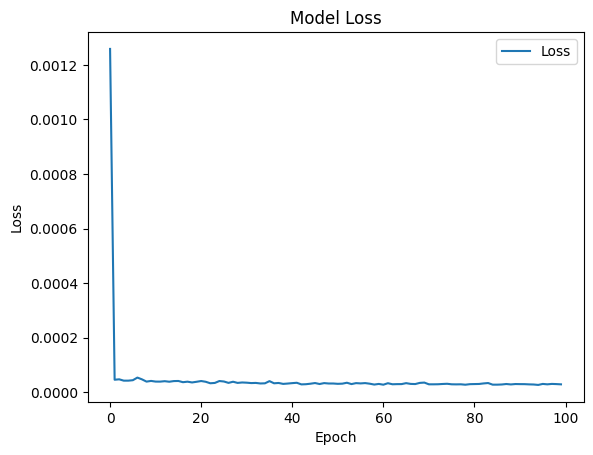

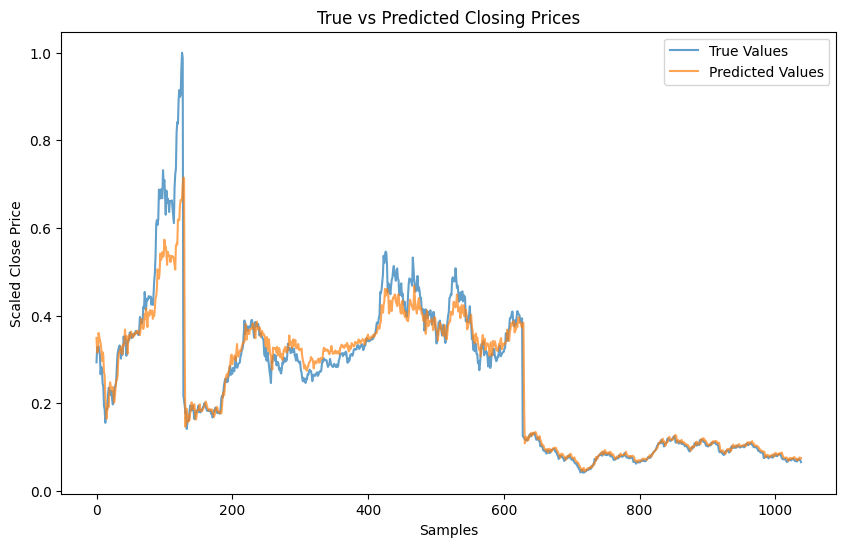

In [11]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Prepare your features (X) and target (y)
data['scaled_close'] = (data['close'] - data['close'].min()) / (data['close'].max() - data['close'].min())

# Create input sequences with a lag of one day
X = []
y = []

# Create sequences of 10 time steps
for i in range(10, len(data) - 1):  # Ensure we leave space for y
    X.append(data['scaled_close'].values[i-10:i])
    y.append(data['scaled_close'].values[i + 1])  # Predict the next day

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X for RNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create RNN model
rnn_model = Sequential()
rnn_model.add(Input(shape=(X_train.shape[1], 1)))  # Use Input layer to specify shape
rnn_model.add(SimpleRNN(50, activation='relu'))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model and store the training history
history = rnn_model.fit(X_train, y_train, epochs=100, verbose=1)  # Set verbose=1 for training output

# Output the model's summary
print(rnn_model.summary())

# Make predictions on the test set
predictions = rnn_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# Optionally, plot the training loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Optionally, plot True vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', alpha=0.7)
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


**10.SVM**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             r2_score, explained_variance_score)

# Load the dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Convert 'date' column to datetime format with dayfirst=True
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], dayfirst=True)  # Specify dayfirst
    data.set_index('date', inplace=True)


# Apply 1-day lag to the closing prices
data['close_lagged'] = data['close'].shift(1)

# Drop rows with NaN values (resulting from the lag)
data.dropna(inplace=True)

# Prepare your features (X) and target variable (y)
X = data[['open', 'high', 'low']].values  # Example features
y = data['close'].values                   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the SVR model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Print predictions for the first 10 instances
print("Predictions for the first 10 instances:")
print(predictions[:10])

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, predictions)  # R² Score
evs = explained_variance_score(y_test, predictions)  # Explained Variance Score


# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance Score (EVS): {evs:.4f}")

Predictions for the first 10 instances:
[ 27.35796984  20.44861982 352.98684473 154.69741867  28.38642094
 144.15507805 709.26346668  27.63925558 203.63658833  54.16806837]
Mean Absolute Error (MAE): 3.1120
Mean Squared Error (MSE): 44.4954
Root Mean Squared Error (RMSE): 6.6705
R² Score: 0.9994
Explained Variance Score (EVS): 0.9994


**NEW MODELS**

**1.BiLSTM**

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0041
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0176e-05
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5496e-05
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7957e-05
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3103e-05
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0169e-05
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0496e-05
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.0808e-05
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0950e-05
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1448e-05
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3879e-05
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.7698e-05
Epoch 13/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3553e-05
Epoch 14/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0441e-05
Epoch 15/100
76/76 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 100)            │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,705 (244.95 KB)

 Trainable params: 20,901 (81.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,804 (163.30 KB)

None
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Mean Squared Error: 0.0023
Mean Absolute Error: 0.0226
Root Mean Squared Error: 0.0474
R-squared: 0.9187
Explained Variance Score: 0.9187


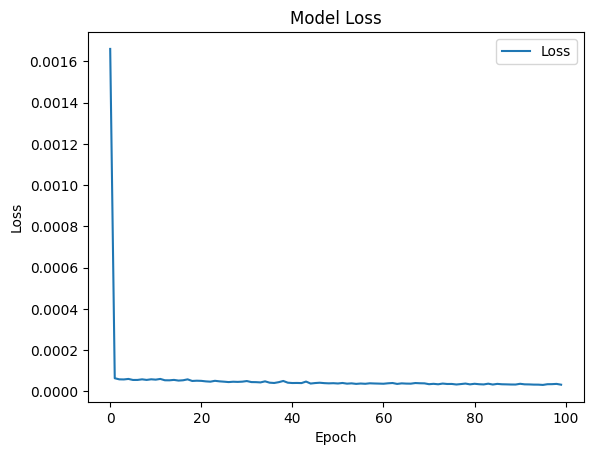

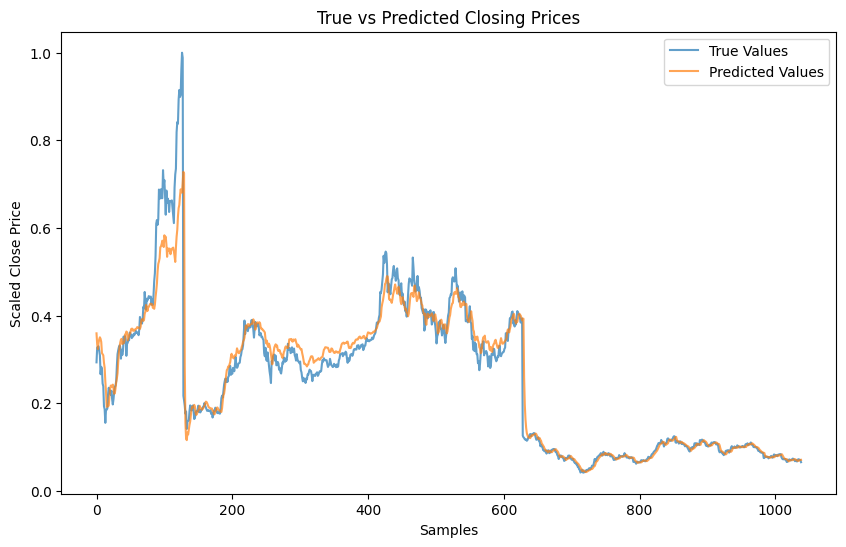

In [13]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Prepare your features (X) and target (y)
data['scaled_close'] = (data['close'] - data['close'].min()) / (data['close'].max() - data['close'].min())

# Create input sequences with a lag of one day
X = []
y = []

# Create sequences of 10 time steps
for i in range(10, len(data) - 1):  # Ensure we leave space for y
    X.append(data['scaled_close'].values[i-10:i])
    y.append(data['scaled_close'].values[i + 1])  # Predict the next day

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Input(shape=(X_train.shape[1], 1)))  # Use Input layer to specify shape
bilstm_model.add(Bidirectional(LSTM(50, activation='relu')))  # Bidirectional LSTM layer
bilstm_model.add(Dense(1))
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model and store the training history
history = bilstm_model.fit(X_train, y_train, epochs=100, verbose=1)  # Set verbose=1 for training output

# Output the model's summary
print(bilstm_model.summary())

# Make predictions on the test set
predictions = bilstm_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)


# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# Optionally, plot the training loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Optionally, plot True vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', alpha=0.7)
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


**2.CDIL-CNN**

In [14]:
pip install lime shap


Note: you may need to restart the kernel to use updated packages.


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0017
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.9660e-05
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.5097e-05
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.8685e-05
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.7528e-05
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.3192e-05
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.7599e-05
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.5707e-04
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.7855e-05
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.3588e-05
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.2650e-05
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.0177e-05
Epoch 13/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6548e-05
Epoch 14/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.3451e-05
Epoch

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 10, 64)    │        256 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 5, 64)     │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 5, 128)    │     24,704 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 2, 128)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 2, 128)    │    131,968 │ max_pooling1d_1[… │
│ (MultiHeadAttentio… │                   │            │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 256)       │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │     16,448 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         65 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 520,325 (1.98 MB)

 Trainable params: 173,441 (677.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 346,884 (1.32 MB)

None
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 0.0048
Mean Absolute Error: 0.0335
Root Mean Squared Error: 0.0693
R-squared: 0.8263
Explained Variance Score: 0.8353


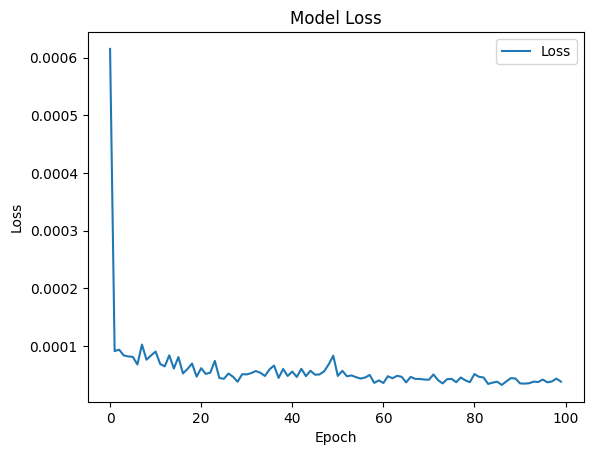

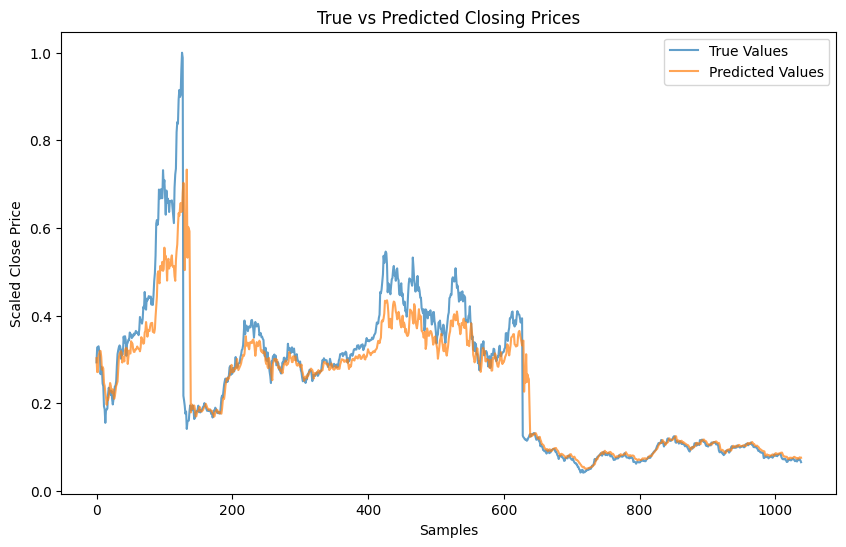

In [15]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Dense, MultiHeadAttention, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Prepare your features (X) and target (y)
data['scaled_close'] = (data['close'] - data['close'].min()) / (data['close'].max() - data['close'].min())

# Create input sequences with a lag of one day
X = []
y = []

# Create sequences of 10 time steps
for i in range(10, len(data) - 1):  # Ensure we leave space for y
    X.append(data['scaled_close'].values[i-10:i])
    y.append(data['scaled_close'].values[i + 1])  # Predict the next day

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X for RNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Functional API for CDIL-CNN model with MultiHeadAttention
input_tensor = Input(shape=(X_train.shape[1], 1))

# Convolutional layers
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_tensor)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2)(x)

# Multi-Head Attention layer - reshape to (batch_size, time_steps, features)
query = x
value = x

# Apply Multi-Head Attention mechanism
attention_output = MultiHeadAttention(num_heads=2, key_dim=128)(query, value)

# Flatten and add dense layers
x = Flatten()(attention_output)
x = Dense(64, activation='relu')(x)
output_tensor = Dense(1)(x)

# Create the model
cdil_cnn_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
cdil_cnn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = cdil_cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Output the model's summary
print(cdil_cnn_model.summary())

# Make predictions on the test set
predictions = cdil_cnn_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# Plot the training loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot True vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', alpha=0.7)
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


**3.BiLSTM Attention Model**

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 5.4766e-04
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.2163e-05
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0227e-04
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3665e-05
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.3761e-05
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.8218e-05
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5883e-05
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.4612e-05
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.3649e-05
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.9407e-05
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4064e-05
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.6308e-05
Epoch 13/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1228e-05
Epoch 14/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.0117e-05
E

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 10, 128)   │     33,792 │ input_layer_6[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 10, 128)   │          0 │ bidirectional_1[… │
│ (Attention)         │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 10, 128)   │          0 │ bidirectional_1[… │
│                     │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1280)      │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │     81,984 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         65 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 347,525 (1.33 MB)

 Trainable params: 115,841 (452.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 231,684 (905.02 KB)

None
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Mean Squared Error: 0.0016
Mean Absolute Error: 0.0157
Root Mean Squared Error: 0.0402
R-squared: 0.9416
Explained Variance Score: 0.9416


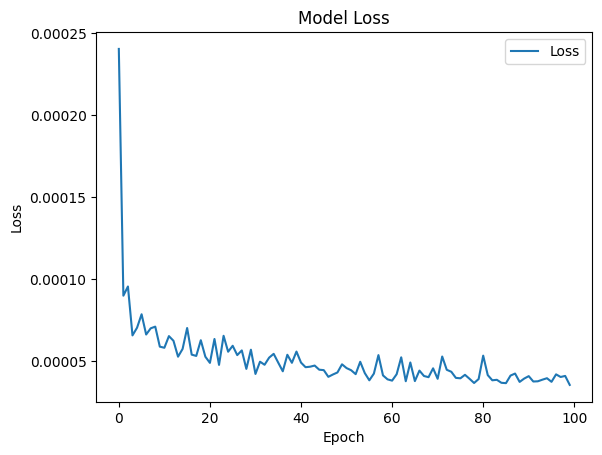

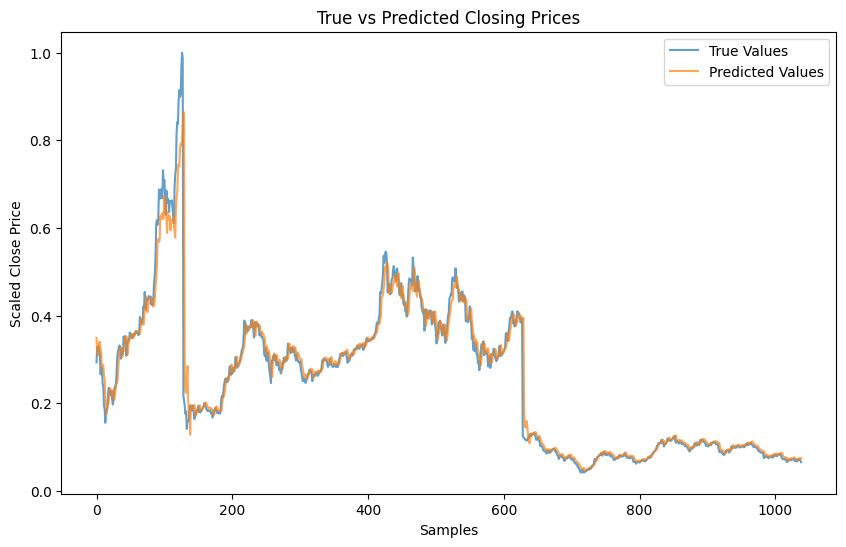

In [16]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, LSTM, Bidirectional, Attention, Dense, Flatten, Add
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Load your dataset
data = pd.read_csv('/kaggle/input/tsla_raw_data_2010_2024.csv')

# Prepare your features (X) and target (y)
data['scaled_close'] = (data['close'] - data['close'].min()) / (data['close'].max() - data['close'].min())

# Create input sequences with a lag of one day
X = []
y = []

# Create sequences of 10 time steps
for i in range(10, len(data) - 1):  # Ensure we leave space for y
    X.append(data['scaled_close'].values[i-10:i])
    y.append(data['scaled_close'].values[i + 1])  # Predict the next day

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# BiLSTM Attention model using Keras Functional API
input_tensor = Input(shape=(X_train.shape[1], 1))

# BiLSTM layer
x = Bidirectional(LSTM(64, return_sequences=True))(input_tensor)

# Attention mechanism
attention = Attention()([x, x])  # Query and value are both from the LSTM layer

# Sum the attention output (can also experiment with other pooling techniques like average)
x = Add()([x, attention])  # Adding the attention context vector to LSTM output

# Flatten and add dense layers
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_tensor = Dense(1)(x)

# Create the model
bilstm_attention_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
bilstm_attention_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = bilstm_attention_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Output the model's summary
print(bilstm_attention_model.summary())

# Make predictions on the test set
predictions = bilstm_attention_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# Plot the training loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot True vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', alpha=0.7)
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()
